<a href="https://colab.research.google.com/github/IanPerigoVianna/Lighthouse_DataScience/blob/main/LH_CD_IAN_PERIGO_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dependências
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno
import matplotlib.pyplot as plt

# Visualizar Dados
- Análise geral das features
- Distingguir formato das features (int, float, char)
- Identificar anomalias, dados ausentes e erros

In [3]:
host = pd.read_csv('teste_indicium_precificacao.csv')
host.describe()


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Análise Geral
- Notamos que algumas features apresentam valores máximos e mínimos discrepantes com a média
- Price apresenta valores mínimos igual a zero o que pode indicar um erro visto que cada imóvel que será alugado tende a ter um preço.

In [4]:
# Análise Geral
host.info()

print('\n')
# Segregação de Dados por Tipo de Dados
colunas_por_dtype = host.columns.to_series().groupby(host.dtypes).groups

for dtype, colunas in colunas_por_dtype.items():
    print(f"Tipo de Dados: {dtype}")
    print(", ".join(colunas))
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [5]:
# Dividir os dados em categóricos e numéricos

categoricos = host.select_dtypes(include='object')
numericos = host.select_dtypes(exclude='object')

In [9]:
# Obter os valores únicos da feature 'categoria'
valores_unicos = categoricos['room_type'].unique()

# Imprimir os valores únicos
print("Valores únicos da feature 'room_type':")
print(valores_unicos)
print('\n')
# Obter os valores únicos da feature 'categoria'
valores_unicos = categoricos['bairro_group'].unique()

# Imprimir os valores únicos
print("Valores únicos da feature 'bairro_group':")
print(valores_unicos)

Valores únicos da feature 'room_type':
['Entire home/apt' 'Private room' 'Shared room']


Valores únicos da feature 'bairro_group':
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


In [10]:
# Verificar valores nulos nos dados categoricos
print('Valores nulos dos dados categoricos em porcentagem')
print(categoricos.isnull().mean() * 100)

Valores nulos dos dados categoricos em porcentagem
nome              0.032724
host_name         0.042950
bairro_group      0.000000
bairro            0.000000
room_type         0.000000
ultima_review    20.558760
dtype: float64


Agora iremos explorar um pouco mais o dataframe com dados categoricos, devemos analisar a possibilidade de codificação dos dados. Fazendo um describe podemos analisar quais features apresentam poucos valores únicos tornando-os mais propensos a codificação.

In [11]:
categoricos.describe()

,nome,host_name,bairro_group,bairro,room_type,ultima_review
count,48878,48873,48894,48894,48894,38842
unique,47904,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


### Vamos visualizar as features não categóricas

Notamos que bairro_group e room_type são candidatos a codificação. Como o tipo de codificação é dependentes da escolha do tipo de machine learning aplicaremos a codificação posteriormente.

In [12]:
print('Valores nulos dos dados numéricos em porcentagem')
print(numericos.isnull().mean() * 100)

Valores nulos dos dados numéricos em porcentagem
id                                0.00000
host_id                           0.00000
latitude                          0.00000
longitude                         0.00000
price                             0.00000
minimo_noites                     0.00000
numero_de_reviews                 0.00000
reviews_por_mes                  20.55876
calculado_host_listings_count     0.00000
disponibilidade_365               0.00000
dtype: float64


<Axes: >

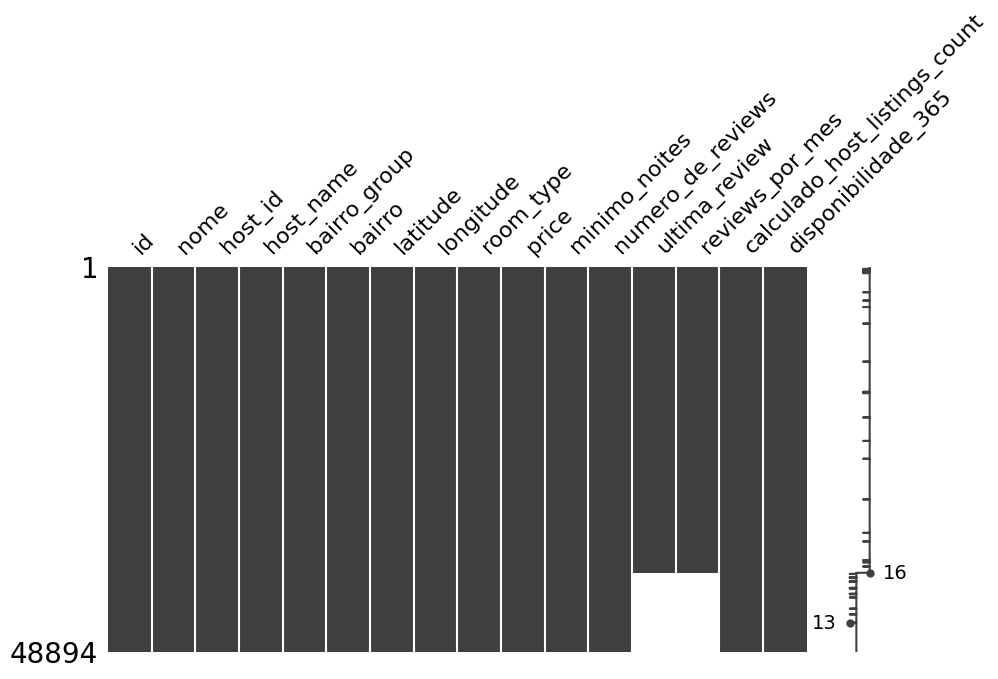

In [13]:
# Plotando o gráfico de missing values do dataset original
matrix = host.sort_values('reviews_por_mes')
msno.matrix(matrix, figsize=(10, 5))

### Como falado anteriormente o preço ser  zero indica algum erro visto que é uma plataforma de locação de imóvel. Vamos contar a quantidade de zeros.
### A quantidade de dias disponível ser 0 também não faz sentindo para locação de imóvel.

Observado uma correlação direta de valores nulos de reviews_por_mes e ultima_reviews.

In [14]:
# Calculando a quantidade de valores iguais a zero na disponibilidade_365

dispobibilidade_zeros = (numericos['disponibilidade_365'] == 0).sum()
print('Número de valores 0 em disponibilidade_365: {}'.format(dispobibilidade_zeros))
# calculando a porcentagem de valores iguais a zero na disponibilidade_365
disponibility_zero_percent = (dispobibilidade_zeros / numericos.shape[0]) * 100
print('Porcentagem de valores 0 em disponibilidade_365: {:.2f}%'.format(disponibility_zero_percent))
print('\n')
price_zero = (numericos['price'] == 0).sum()
price_zero_percent = (price_zero / numericos.shape[0])*100
print('Número de valores 0 em preço: {}'.format(price_zero))
print ('Porcentagem de valores 0 em price: {:.2f}%'.format(price_zero_percent))

Número de valores 0 em disponibilidade_365: 17533
Porcentagem de valores 0 em disponibilidade_365: 35.86%


Número de valores 0 em preço: 11
Porcentagem de valores 0 em price: 0.02%


Vamos calcular a média,mediana e moda das features com valores nulos para posteriormente fazermos os inputs.

In [15]:
# Vamos calcular a média, mediana e moda de ultima_review, reviews_por_mes, numero_de_reviews e Disponibilidade_365



# Não Categórico
mean_last_review = numericos['reviews_por_mes'].mean()
median_ultima_review = numericos['reviews_por_mes'].median()
mode_ultima_review = numericos['reviews_por_mes'].mode()
print('Média de reviews_por_mes: {:.2f}'.format(mean_last_review))
print('Mediana de reviews_por_mes: {:.2f}'.format(median_ultima_review))
print('Moda de reviews_por_mes: {:.2f}'.format(mode_ultima_review[0]))
print('\n')
mean_numero_de_reviews = numericos['numero_de_reviews'].mean()
median_numero_de_reviews = numericos['numero_de_reviews'].median()
mode_numero_de_reviews = numericos['numero_de_reviews'].mode()
print('Média de numero_de_reviews: {:.2f}'.format(mean_numero_de_reviews))
print('Mediana de numero_de_reviews: {:.2f}'.format(median_numero_de_reviews))
print('Moda de numero_de_reviews: {:.2f}'.format(mode_numero_de_reviews[0]))

mean_disponibilidade_365 = numericos['disponibilidade_365'].mean()
median_disponibilidade_365 = numericos['disponibilidade_365'].median()
mode_disponibilidade_365 = numericos['disponibilidade_365'].mode()
print('\n')
print('Média de disponibilidade_dias_365: {:.2f}'.format(mean_disponibilidade_365))
print('Mediana de disponibilidade_dias_365: {:.2f}'.format(median_disponibilidade_365))
print('Moda de disponibilidade_dias_365: {:.2f}'.format(mode_disponibilidade_365[0]))

# Vamos calcular a média, mediana e moda de preço
mean_price = numericos['price'].mean()
median_price = numericos['price'].median()
mode_price = numericos['price'].mode()
print('\n')
print('Média de preço: {:.2f}'.format(mean_price))
print('Mediana de preço: {:.2f}'.format(median_price))
print('Moda de preço: {:.2f}'.format(mode_price[0]))

# Vamos calcular a média , mediana e moda de reviews_por_mes
mean_reviews_por_mes = numericos['reviews_por_mes'].mean()
median_reviews_por_mes = numericos['reviews_por_mes'].median()
mode_reviews_por_mes = numericos['reviews_por_mes'].mode()
print('\n')
print('Média de reviews_por_mes: {:.2f}'.format(mean_reviews_por_mes))
print('Mediana de reviews_por_mes: {:.2f}'.format(median_reviews_por_mes))
print('Moda de reviews_por_mes: {:.2f}'.format(mode_reviews_por_mes[0]))


Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


Média de numero_de_reviews: 23.27
Mediana de numero_de_reviews: 5.00
Moda de numero_de_reviews: 0.00


Média de disponibilidade_dias_365: 112.78
Mediana de disponibilidade_dias_365: 45.00
Moda de disponibilidade_dias_365: 0.00


Média de preço: 152.72
Mediana de preço: 106.00
Moda de preço: 100.00


Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


# Manipulando e Preparando os dados
- Imputando valores ausentes e nulos
    - Features categóricas
    - Features não categóricas
- Diagnosticar e tratar Outliers
- Transformação de dados

In [16]:
# Inputar valores nulos da feature ultima_review que é categórica com a moda

#Cópia profunda dos dados categóricos
categoricos_input = categoricos.copy()

modal_ultima_review = categoricos_input['ultima_review'].mode()[0]
categoricos_input['ultima_review']= categoricos_input['ultima_review'].fillna(modal_ultima_review)

# Verificar se os valores nulos foram inputados
print(categoricos_input.isnull().sum())

nome             16
host_name        21
bairro_group      0
bairro            0
room_type         0
ultima_review     0
dtype: int64


In [17]:
# Inputar valores nulos da feature numero_de_review e reviews_por_mes que é numérica com a média

numericos_views_input = numericos.copy()


numericos_views_input['numero_de_reviews']= numericos_views_input['numero_de_reviews'].fillna(median_numero_de_reviews)
numericos_views_input['reviews_por_mes']= numericos_views_input['reviews_por_mes'].fillna(median_reviews_por_mes)


# Verificar se os valores nulos foram inputados
print(numericos_views_input.isnull().sum())
print('\n')
numericos_views_input.head()

id                               0
host_id                          0
latitude                         0
longitude                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64




,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
1,3647,4632,40.80902,-73.94190,150,3,0,0.72,1,365
2,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
3,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
4,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129


Os valores nulos foram substituidos, porém notamos que em algumas linhas a feature reviews_por_mes é maior que zero mesmo com o número de reviews sendo igual a zero, o que indica uma inconsistência nos dados. Vamos fazer uma expressão booleana para corrigir este erro, inputando valor zero nos reviews_por_mes.

In [19]:
linhas_selecionadas = numericos_views_input[(numericos_views_input['numero_de_reviews'] == 0) & (numericos_views_input['reviews_por_mes'] > 0)]

quantidade_linhas = len(linhas_selecionadas)

# Exibir a quantidade de linhas
print("Quantidade de linhas que atendem à condição:", quantidade_linhas)
print('\n)')
# Substituir valores de 'reviews_por_mes' por zero nas linhas onde 'numero_de_reviews' é igual a zero
numericos_views_input.loc[numericos_views_input['numero_de_reviews'] == 0, 'reviews_por_mes'] = 0
linhas_zero_zero = numericos_views_input[(numericos_views_input['numero_de_reviews'] == 0) & (numericos_views_input['reviews_por_mes'] == 0)]

# Confirmando se quando as features 'numero_de_reviews' são 0, 'reviews_por_mes' é igual a zero
print(linhas_zero_zero)

Quantidade de linhas que atendem à condição: 10052

)
             id   host_id  latitude  longitude  price  minimo_noites  \
1          3647      4632  40.80902  -73.94190    150              3   
18         7750     17985  40.79685  -73.94872    190              7   
25         8700     26394  40.86754  -73.92639     80              4   
35        11452      7355  40.68876  -73.94312     35             60   
37        11943     45445  40.63702  -73.96327    150              1   
...         ...       ...       ...        ...    ...            ...   
48889  36484665   8232441  40.67853  -73.94995     70              2   
48890  36485057   6570630  40.70184  -73.93317     40              4   
48891  36485431  23492952  40.81475  -73.94867    115             10   
48892  36485609  30985759  40.75751  -73.99112     55              1   
48893  36487245  68119814  40.76404  -73.98933     90              7   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
1    

In [20]:

numericos_price_input = numericos_views_input.copy()

# Substituir os valores iguais a zero pela média
numericos_price_input['price'] = numericos_price_input['price'].replace(0, mean_price)

# Verificar se os valores iguais a zero foram substituídos
print('Número de valores 0 em price: {}'.format((numericos_price_input['price'] == 0).sum()))

Número de valores 0 em price: 0


Escolhi inputar a disponibilidade_365 com a mediana para não afetar a distribuição estatística.

In [21]:
# inputar valores iguais a zero em disponibilidade_365 com a mediana
numericos_365_input = numericos_price_input.copy()
numericos_365_input['disponibilidade_365'] = numericos_365_input['disponibilidade_365'].replace(0, median_disponibilidade_365)

print('Número de valores 0 em disponibilidade_365: {}'.format((numericos_365_input['disponibilidade_365'] == 0).sum()))
#Novo dataset com as copias de todas inputações dos numéricos
host_numericos = numericos_365_input.copy()

Número de valores 0 em disponibilidade_365: 0


In [22]:
#concatenar os dados categóricos e numéricos
host_input = pd.concat([categoricos_input, host_numericos], axis=1)
host_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           48878 non-null  object 
 1   host_name                      48873 non-null  object 
 2   bairro_group                   48894 non-null  object 
 3   bairro                         48894 non-null  object 
 4   room_type                      48894 non-null  object 
 5   ultima_review                  48894 non-null  object 
 6   id                             48894 non-null  int64  
 7   host_id                        48894 non-null  int64  
 8   latitude                       48894 non-null  float64
 9   longitude                      48894 non-null  float64
 10  price                          48894 non-null  float64
 11  minimo_noites                  48894 non-null  int64  
 12  numero_de_reviews              48894 non-null 

### Diagnosticar e tratar Outliers usando a Regra empírica


<ipython-input-25-8c8d51e1b0f5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=host_input, y=feature, palette="muted", ax=axes[0,i])
<ipython-input-25-8c8d51e1b0f5>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_outliers, y=feature, palette="muted", ax=axes[1,i])  # use i+num_cols para colocar o segundo boxplot na linha abaixo
<ipython-input-25-8c8d51e1b0f5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=host_input, y=feature, palette="muted", ax=axes[0,i])
<ipython-input-25-8c8d51e1b0f5>:37: FutureWarning:

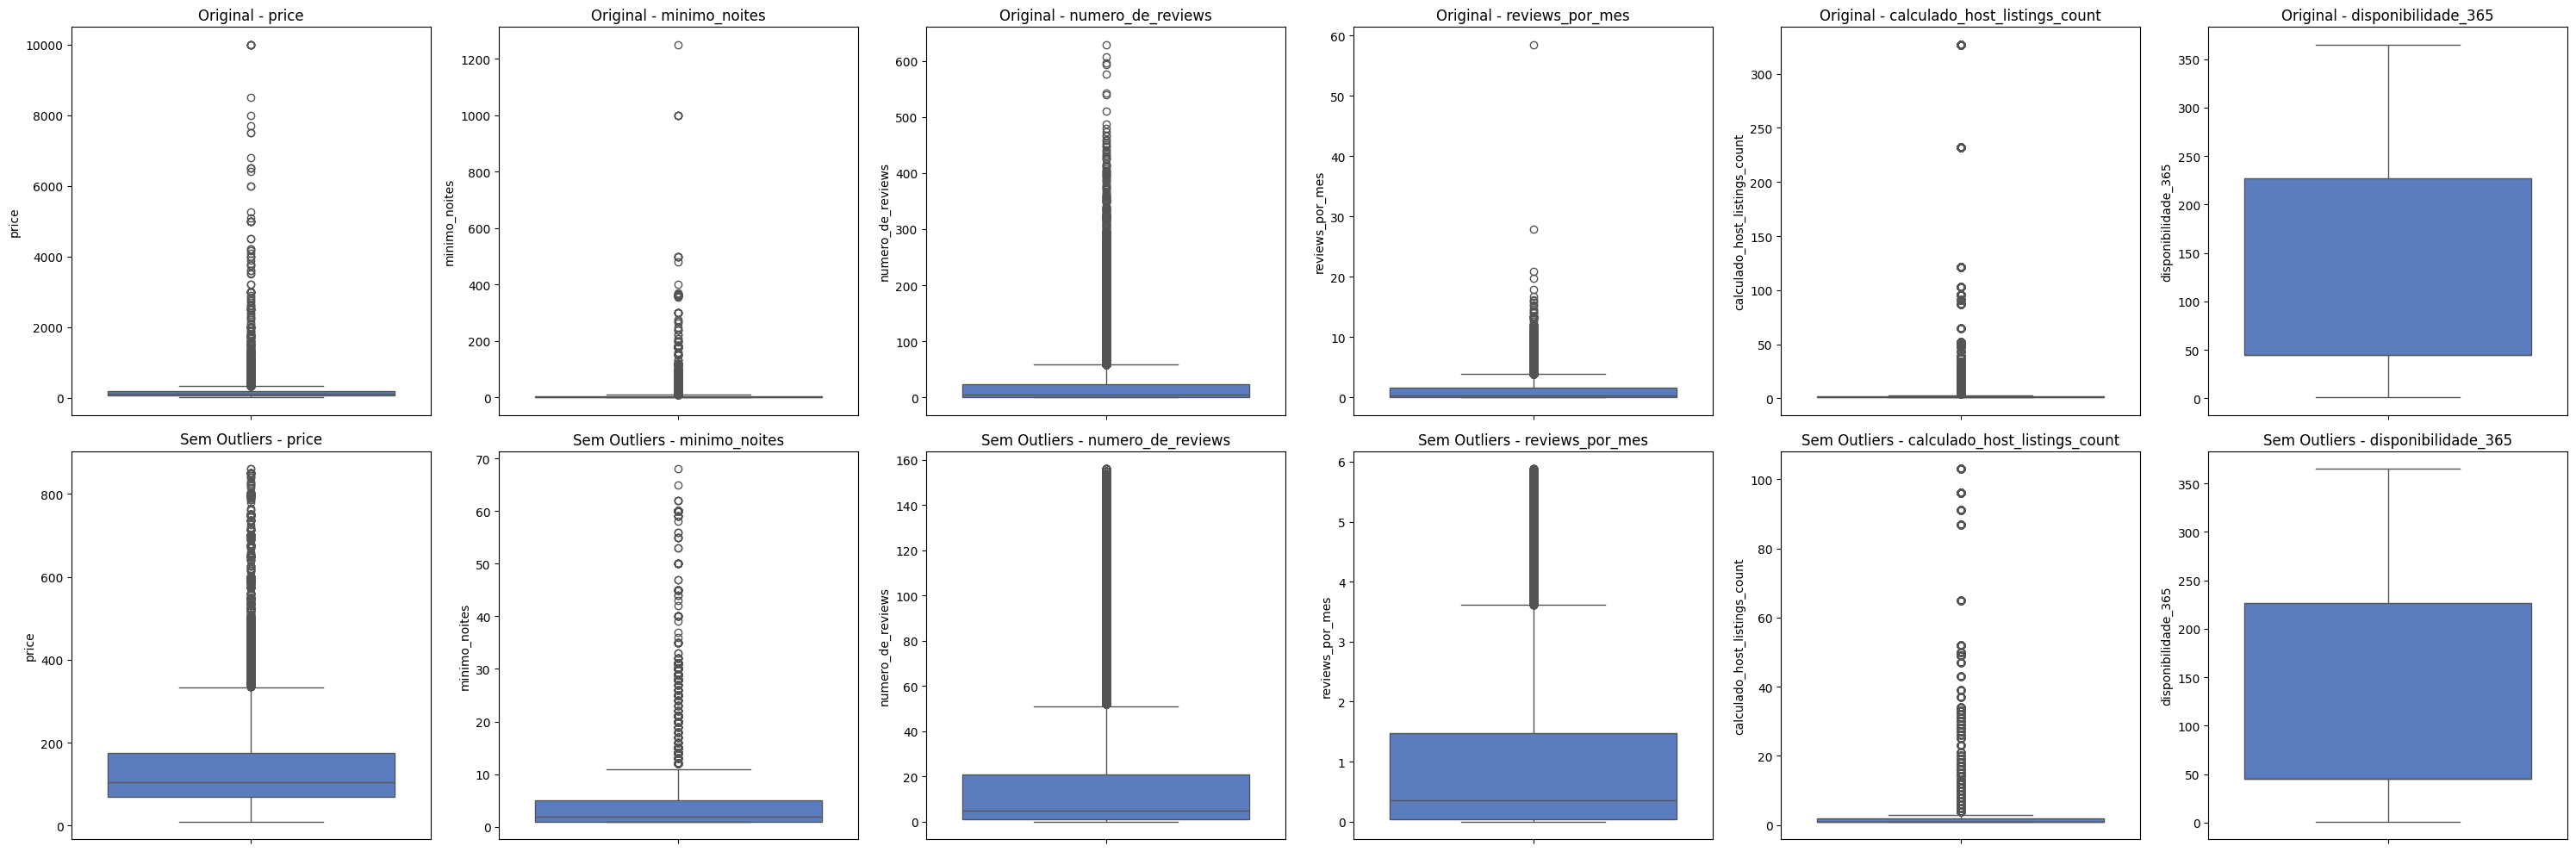

In [25]:
def drop_outliers_3std_multi(df, columns):
    df2 = df.copy()

    for column in columns:
        m = df2[column].mean()
        sd = df2[column].std()
        upper = m + 3*sd
        lower = m - 3*sd

        i_up = df2[df2[column] > upper].index
        i_lo = df2[df2[column] < lower].index

        df2.drop(i_up, axis=0, inplace=True)
        df2.drop(i_lo, axis=0, inplace=True)

    return df2

# Lista de features que você deseja incluir no gráfico
features_to_plot = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

# Número de colunas no subplot (ajuste conforme necessário)
num_cols = len(features_to_plot)

# Criar subplots
fig, axes = plt.subplots(ncols=num_cols, nrows=2, figsize=(5*num_cols, 10))

# Loop através das features e plotar boxplots
for i, feature in enumerate(features_to_plot):
    # Boxplot Original
    sns.boxplot(data=host_input, y=feature, palette="muted", ax=axes[0,i])
    axes[0,i].set_title(f"Original - {feature}")

    # Remover outliers usando drop_outliers_3std_multi
    df_without_outliers = drop_outliers_3std_multi(host_input, columns=[feature])

    # Boxplot Sem Outliers
    sns.boxplot(data=df_without_outliers, y=feature, palette="muted", ax=axes[1,i])  # use i+num_cols para colocar o segundo boxplot na linha abaixo
    axes[1, i].set_title(f"Sem Outliers - {feature}")

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


Identificado uma presença muito forte de outliers na maior parte das features.

In [76]:
# Dropano os outliers das features que apresentaram mais outliers
columns_to_drop_outliers = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes','calculado_host_listings_count',]

df_without_outliers_multi = drop_outliers_3std_multi(host_input, columns=columns_to_drop_outliers)

df_without_outliers_multi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45483 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           45468 non-null  object 
 1   host_name                      45464 non-null  object 
 2   bairro_group                   45483 non-null  object 
 3   bairro                         45483 non-null  object 
 4   room_type                      45483 non-null  object 
 5   ultima_review                  45483 non-null  object 
 6   id                             45483 non-null  int64  
 7   host_id                        45483 non-null  int64  
 8   latitude                       45483 non-null  float64
 9   longitude                      45483 non-null  float64
 10  price                          45483 non-null  float64
 11  minimo_noites                  45483 non-null  int64  
 12  numero_de_reviews              45483 non-null 

Mais de 3 mil linhas do nosso dataset foram dropadas devido aos outliers.

Text(7700.0, 2889.915, 'kurt = 585.76')

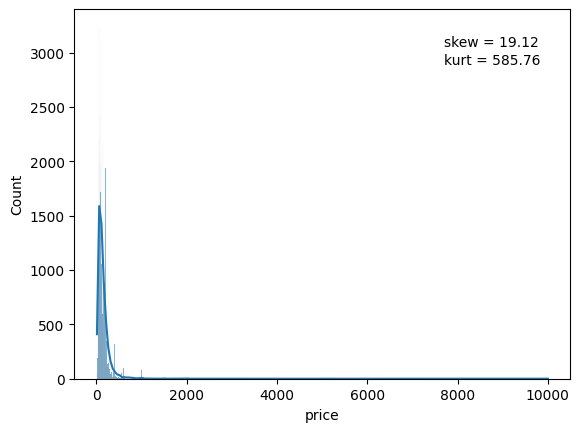

In [30]:
col = 'price'
skw = host_numericos[col].skew()
krt = host_numericos[col].kurt()
max_x = host_numericos[col].max()
g = sns.histplot(host_numericos[col],kde=True);
max_y = g.get_ylim()[1]
plt.text(0.77*max_x,0.9*max_y,f"skew = {skw:0.2f}")
plt.text(0.77*max_x,0.85*max_y,f"kurt = {krt:0.2f}")



Text(662.2, 2428.4925000000003, 'kurt = 9.00')

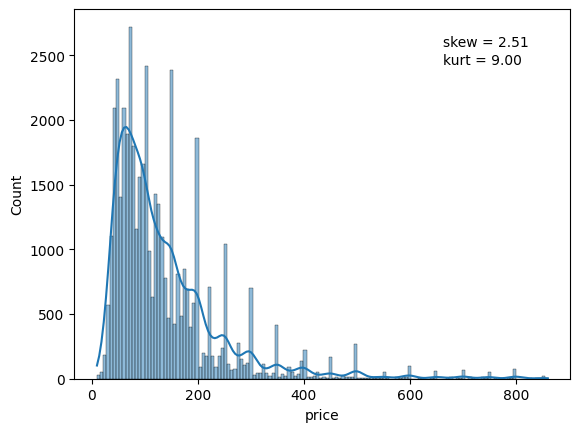

In [31]:
col = 'price'
skw = df_without_outliers_multi[col].skew()
krt = df_without_outliers_multi[col].kurt()
max_x = df_without_outliers_multi[col].max()
g = sns.histplot(df_without_outliers_multi[col],kde=True);
max_y = g.get_ylim()[1]
plt.text(0.77*max_x,0.9*max_y,f"skew = {skw:0.2f}")
plt.text(0.77*max_x,0.85*max_y,f"kurt = {krt:0.2f}")

# Análise Exploratória de Dados (EDA)

### Objetivos:
- Definir os atributos mais adequados.
- Encontrar padrões
- Validar resultados.
- Refinar Features que serão utilizados para ML

Dropando os outliers conseguimos diminuir a assimetria e a caudose. Foi realizado a transformação logarítmica, porém esta não gerou bons resultados de correlação e score. Optei por tirar do notebook para deixar a resolução do desafio mais objetiva.

In [77]:
df_without_outliers_multi = df_without_outliers_multi.drop(['latitude','longitude','id','host_id'], axis=1)
#df_without_out_object = df_without_outliers_multi.select_dtypes(exclude='object')

In [78]:
correlation_drop_out = df_without_outliers_multi.corr()
correlation_drop_out['price'].sort_values(ascending=False)

<ipython-input-78-5b1baac23fef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_drop_out = df_without_outliers_multi.corr()


price                            1.000000
disponibilidade_365              0.092554
calculado_host_listings_count    0.044125
minimo_noites                    0.011502
reviews_por_mes                 -0.032036
numero_de_reviews               -0.037464
Name: price, dtype: float64

As correlações das features pelos preço. Não apresentou correlações fortes, vamos explorar outras features categóricas, transformado o que for necessário para avaliar as correlações novamente.

Transformação de features categóricas em booleanas e/ou numéricas

Agora vamos transformar alguns dados categoricos que apresentaram potêncial para transformação com dummies, são eles : bairro_group, type_room e bairro.


In [79]:


# Criar um novo DataFrame
df_dummies = pd.DataFrame()

# Lista de features para criar dummy
array_dum = ['room_type', 'bairro_group']

# Iterar sobre as features selecionadas
for dummie in array_dum:
    # Gerar as variáveis dummy
    lista_dum = pd.get_dummies(df_without_outliers_multi[dummie], prefix=dummie)

    # Adicionar as variáveis dummy ao novo DataFrame
    df_dummies = pd.concat([df_dummies, lista_dum], axis=1)

# Adicionar as variáveis dummy de 'bairro' ao novo DataFrame
bairro_dummies = pd.get_dummies(df_without_outliers_multi['bairro'], prefix='bairro')
df_dummies = pd.concat([df_dummies, bairro_dummies], axis=1)

# Exibir o novo DataFrame com variáveis dummy
print("Novo DataFrame com variáveis dummy:")
print(df_dummies.head())



Novo DataFrame com variáveis dummy:
   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                          1                       0                      0   
1                          0                       1                      0   
3                          1                       0                      0   
4                          1                       0                      0   
5                          0                       1                      0   

   bairro_group_Bronx  bairro_group_Brooklyn  bairro_group_Manhattan  \
0                   0                      0                       1   
1                   0                      0                       1   
3                   0                      0                       1   
4                   0                      0                       1   
5                   0                      1                       0   

   bairro_group_Queens  bairro_group_Staten Island  bair

In [80]:
df_without_outliers_multi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45483 entries, 0 to 48893
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           45468 non-null  object 
 1   host_name                      45464 non-null  object 
 2   bairro_group                   45483 non-null  object 
 3   bairro                         45483 non-null  object 
 4   room_type                      45483 non-null  object 
 5   ultima_review                  45483 non-null  object 
 6   price                          45483 non-null  float64
 7   minimo_noites                  45483 non-null  int64  
 8   numero_de_reviews              45483 non-null  int64  
 9   reviews_por_mes                45483 non-null  float64
 10  calculado_host_listings_count  45483 non-null  int64  
 11  disponibilidade_365            45483 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usag

In [81]:
# Converter todas as variáveis dummy para tipo int
columns_to_convert_int = df_dummies.columns[df_dummies.columns.str.startswith('result_')]

# Iterar sobre todas as variáveis dummy
for column in columns_to_convert_int:
    df_dummies[column] = df_dummies[column].astype(int)

# Converter todas as colunas de tipo uint8 para int
uint8_columns = df_dummies.select_dtypes(include='uint8').columns
df_dummies[uint8_columns] = df_dummies[uint8_columns].astype(int)

# Identificar todas as colunas de tipo booleano
boolean_columns = df_dummies.select_dtypes(include='bool').columns

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45483 entries, 0 to 48893
Columns: 229 entries, room_type_Entire home/apt to bairro_Woodside
dtypes: int64(229)
memory usage: 79.8 MB


In [82]:
correlacao_price = df_without_outliers_multi.corr()['price']
print(correlacao_price)

price                            1.000000
minimo_noites                    0.011502
numero_de_reviews               -0.037464
reviews_por_mes                 -0.032036
calculado_host_listings_count    0.044125
disponibilidade_365              0.092554
Name: price, dtype: float64


<ipython-input-82-c80765f3926b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_price = df_without_outliers_multi.corr()['price']


In [83]:
# Encontrar os 30 bairros mais frequentes
top_30_bairros = df_without_outliers_multi['bairro'].value_counts().head(30)

# Imprimir os 30 bairros mais frequentes
print("Os 10 bairros mais frequentes:")
print(top_30_bairros)


Os 10 bairros mais frequentes:
Williamsburg                 3733
Bedford-Stuyvesant           3498
Harlem                       2525
Bushwick                     2356
Upper West Side              1833
East Village                 1735
Hell's Kitchen               1725
Upper East Side              1697
Crown Heights                1505
Midtown                      1393
Greenpoint                   1086
East Harlem                  1038
Chelsea                       978
Astoria                       861
Washington Heights            861
Lower East Side               856
West Village                  708
Flatbush                      604
Clinton Hill                  542
Long Island City              513
Prospect-Lefferts Gardens     508
Park Slope                    476
Fort Greene                   473
East Flatbush                 472
Financial District            471
Kips Bay                      432
Murray Hill                   412
Ridgewood                     408
Flushing         

In [84]:
# Adicione a coluna 'price' de df_without_outliers_multi a df_dummies
#df_dummies['price'] = df_without_outliers_multi['price']

# Adicione todas as colunas numéricas de df_without_outliers_multi a df_dummies
df_dummies = pd.concat([df_dummies, df_without_outliers_multi.select_dtypes(include='number')], axis=1)

# Calcular as correlações absolutas entre as variáveis dummy de 'bairro' e 'price'
correlacoes_absolutas_bairro = df_dummies.corr().abs()['price']

# Filtrar apenas os valores negativos e positivos
negativos = correlacoes_absolutas_bairro[correlacoes_absolutas_bairro < 0].sort_values(ascending=True)
positivos = correlacoes_absolutas_bairro[correlacoes_absolutas_bairro > 0].sort_values(ascending=False)

# Imprimir as correlações absolutas negativas
print("Correlações absolutas negativas:")
print(negativos)

# Imprimir as correlações absolutas positivas
print("Correlações absolutas positivas:")
print(positivos)




Correlações absolutas negativas:
Series([], Name: price, dtype: float64)
Correlações absolutas positivas:
price                        1.000000
room_type_Entire home/apt    0.498891
room_type_Private room       0.467708
bairro_group_Manhattan       0.286137
bairro_Midtown               0.206067
                               ...   
bairro_Bay Terrace           0.000455
bairro_Eltingville           0.000297
bairro_Castleton Corners     0.000175
bairro_Holliswood            0.000174
bairro_Unionport             0.000069
Name: price, Length: 235, dtype: float64


In [85]:


# Adicione a coluna 'price' de df_without_outliers_multi a df_dummies
#df_dummies['price'] = df_without_outliers_multi['price']

# Calcular as correlações absolutas entre as variáveis dummy de 'bairro' e 'price'
correlacoes_absolutas_bairro = df_dummies.corr().abs()['price']

# Selecionar os 30 bairros mais frequentes com maior valor absoluto de correlação
top_30_correlacoes_bairro = correlacoes_absolutas_bairro.sort_values(ascending=False).head(30)

# Filtrar apenas as colunas correspondentes aos top 30 bairros
df_top_30_dummies = df_dummies[top_30_correlacoes_bairro.index]

# Exibir o DataFrame resultante
print("DataFrame com os top 30 bairros mais frequentes e maior correlação com preço:")
print(df_top_30_dummies.head())



KeyboardInterrupt: 

In [86]:
df_top_30_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45483 entries, 0 to 48893
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      45483 non-null  float64
 1   room_type_Entire home/apt  45483 non-null  int64  
 2   room_type_Private room     45483 non-null  int64  
 3   bairro_group_Manhattan     45483 non-null  int64  
 4   bairro_Midtown             45483 non-null  int64  
 5   bairro_group_Brooklyn      45483 non-null  int64  
 6   bairro_group_Queens        45483 non-null  int64  
 7   bairro_Bushwick            45483 non-null  int64  
 8   bairro_Chelsea             45483 non-null  int64  
 9   bairro_West Village        45483 non-null  int64  
 10  room_type_Shared room      45483 non-null  int64  
 11  bairro_Hell's Kitchen      45483 non-null  int64  
 12  bairro_Bedford-Stuyvesant  45483 non-null  int64  
 13  bairro_Tribeca             45483 non-null  int

Agora possuimos um ranking das correlações com os bairros por valor absoluto, distinguindo as correlações positivas que indicam um preço mais caro e negativa que indicam um preço menor.

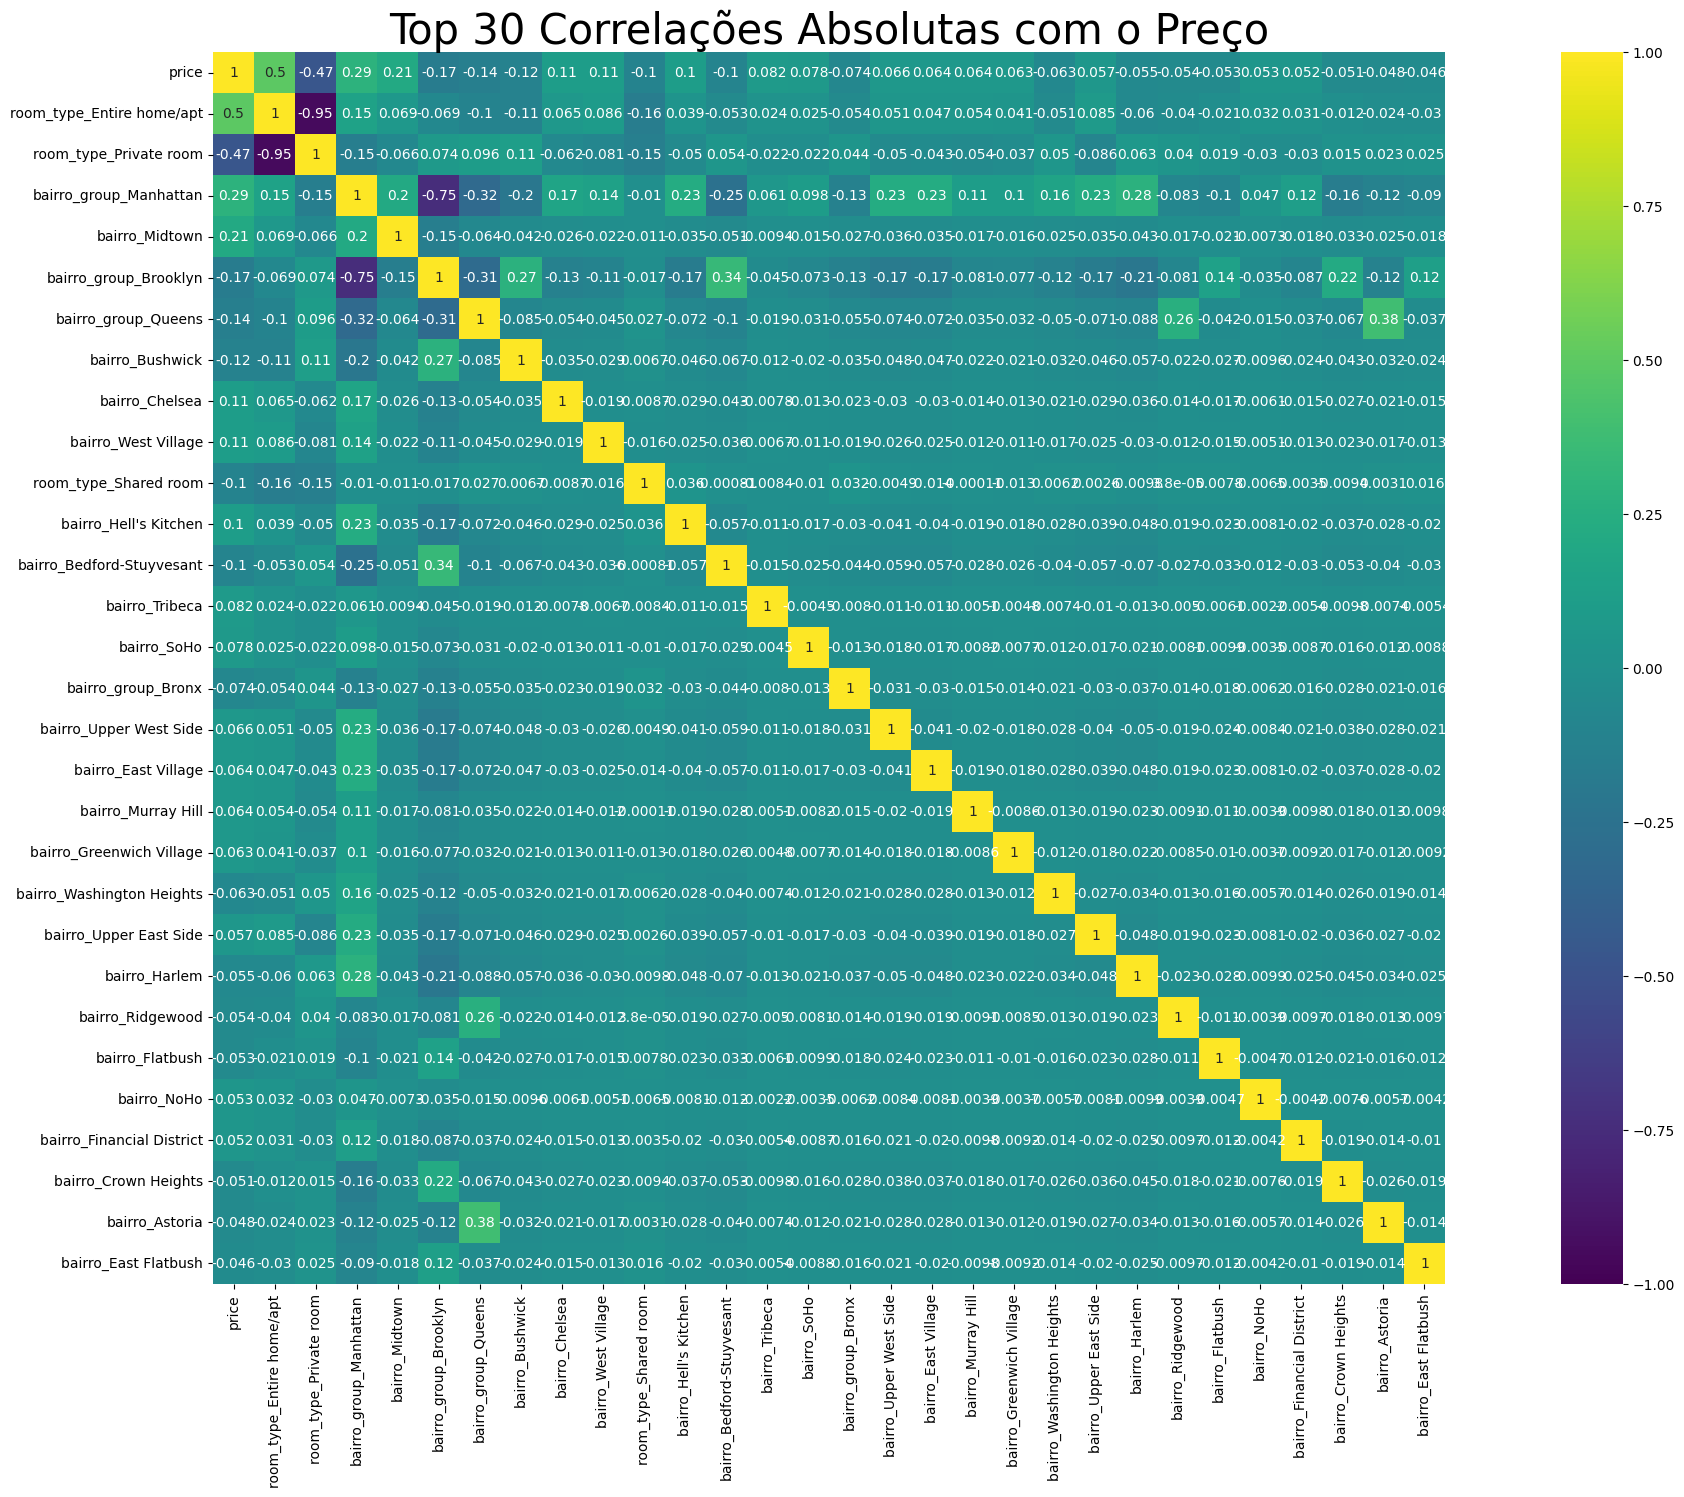

In [87]:
# Correlação entre as variáveis e o preço
correlation= df_top_30_dummies.corr()
correlation_with_price = correlation['price'].abs().sort_values(ascending=False)

# Selecionar as top 30 correlações
top_20_correlations = correlation.loc[correlation_with_price.index[:30], correlation_with_price.index[:30]]

# Plotar o top 30 das correlações
f, ax = plt.subplots(figsize=(30, 16))
plt.title('Top 30 Correlações Absolutas com o Preço', y=1, size=30)
sns.heatmap(top_20_correlations,
            square=True,
            vmin=-1.0,
            vmax=1.0,
            cmap='viridis',
            annot=True,  # Adiciona os valores de correlação
            annot_kws={"size": 10})  # Tamanho da fonte dos valores
plt.show()
plt.show()

Análise:
- Os tipos de locação total apresenta a correlação  mais forte com o preço, e o tipo private room apresenta uma correlação negativa. Faz sentindo essa relação pois a locação de um imóvel inteiro tende a ser fator determinante do preço.
- O grupo de bairro de Manhattan apresenta a terceira maior correlação e as demais também são pelas features dos bairros.
- As demais features numéricas ( disponibilidade, mínimo de noites, reviews e quantidade de anúncios do host) não apareceram no ranking das correlações mais fortes. Anteriormente foi testado uma regressão linear múltipla com essas features e sem os bairros, porém o score foi baixo (0.35)

Vou começar a aplicar alguns modelos de treinamento.
Escolhi regressão linear por se tratar de um problema onde a variável da resposta é contínua. O  objetivo será modelar a relação entre as variáveis independentes (bairros,tipo de locação, etc..) e a variável de resposta (preço) para fazermos previsões ou entender a relação entre essas variáveis.

In [91]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd


In [152]:
X = df_top_30_dummies.drop('price', axis=1)
y = df_top_30_dummies['price']

In [104]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicialize o StandardScaler e ajuste/transforme aos dados de treinamento
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplique o PCA aos dados de treinamento
n_components = 29  # Ajuste conforme necessário
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Inicialize o modelo de regressão linear
modelo = LinearRegression()

# Ajuste o modelo aos dados de treinamento reduzidos pelo PCA
modelo.fit(X_train_pca, y_train)

# Faça previsões no conjunto de teste
y_pred = modelo.predict(X_test_pca)

# Avalie o desempenho usando R²
score = r2_score(y_test, y_pred)

# Imprima o score (R²)
print('Score (R²):', score)

Score (R²): 0.33802473008114464


In [106]:
modelo.intercept_

137.60361700199448

In [105]:
modelo.intercept_
# Obtenha os coeficientes e os nomes das features em uma lista
coeficientes_features = list(zip(modelo.coef_, X.columns))

# Ordene a lista de forma descendente com base nos coeficientes
coeficientes_ordenados = sorted(coeficientes_features, reverse=True)

# Imprima os coeficientes e nomes das features
print('Coeficientes das features:')
for coef, feature in coeficientes_ordenados:
    print(f'{feature}: {coef}')

Coeficientes das features:
room_type_Shared room: 12.87807402183279
bairro_group_Manhattan: 7.84849587992967
bairro_Financial District: 6.279908374210004
bairro_Hell's Kitchen: 4.916955358709265
bairro_Flatbush: 4.292003125613508
bairro_Upper East Side: 4.105100904601942
bairro_Greenwich Village: 3.8585938377843103
bairro_Washington Heights: 2.447695016085152
bairro_NoHo: 1.3196109058333403
bairro_group_Bronx: 1.1234837581959483
bairro_East Village: 0.7702939685401372
bairro_Upper West Side: 0.1694978569019084
bairro_group_Queens: -0.3158628957655587
bairro_Chelsea: -0.674743815689178
bairro_Harlem: -0.9228063109058064
bairro_Bedford-Stuyvesant: -0.942933470519137
bairro_Murray Hill: -1.6249867926768882
bairro_SoHo: -2.6701590045635752
bairro_Bushwick: -3.138277512772717
bairro_Tribeca: -3.164089421119316
bairro_group_Brooklyn: -3.432743326342306
bairro_West Village: -3.6492194673572875
bairro_Ridgewood: -4.938684618875405
bairro_Crown Heights: -5.844035956187146
bairro_Midtown: -7.973

Vamos aplicar aprendizado profundo

In [121]:
#MLP

#!pip install keras scikit-learn


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LeakyReLU
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [141]:
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())
#display(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [126]:
model = Sequential()
#layer 1
model.add(Dense(250, input_dim=29, activation='linear'))
model.add(Dropout(0.1))


#layer 2
model.add(Dense(150))
model.add(Activation('tanh'))
model.add(Dropout(0.1))

#layer 3
model.add(Dense(10))
model.add(LeakyReLU(alpha = 0.1))

#Output layer
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 250)               7500      
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                                                 
 dense_9 (Dense)             (None, 150)               37650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1510      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 10)               

In [127]:
model.compile(loss='mse',optimizer=RMSprop(0.01), metrics=['mse','mae'])
my_model = model.fit(x_train, y_train, epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
995/995 [==============================] - 5s 5ms/step - loss: 0.0322 - mse: 0.0322 - mae: 0.0886 - val_loss: 0.0143 - val_mse: 0.0143 - val_mae: 0.0961
Epoch 2/50
995/995 [==============================] - 4s 4ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0672 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0714
Epoch 3/50
995/995 [==============================] - 4s 4ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0671 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0594
Epoch 4/50
995/995 [==============================] - 4s 4ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0664 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0580
Epoch 5/50
995/995 [==============================] - 5s 5ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0665 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0631
Epoch 6/50
995/995 [==============================] - 5s 5ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0662 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0572
Epoch 7/50
995/9

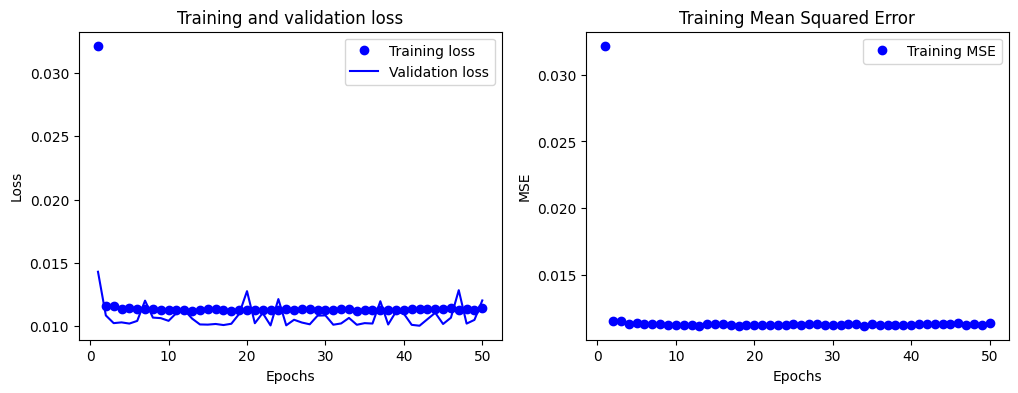

In [128]:
# Treinamento do modelo
history = my_model.history

# Extraindo as métricas
loss = history['loss']
val_loss = history['val_loss']
mse = history['mse']
mae = history['mae']

# Número de épocas
epochs = range(1, len(loss) + 1)

# Visualizando a perda
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualizando o erro quadrático médio
plt.subplot(1, 2, 2)
plt.plot(epochs, mse, 'bo', label='Training MSE')
plt.title('Training Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.show()

Text(0.5, 0, 'Épocas')

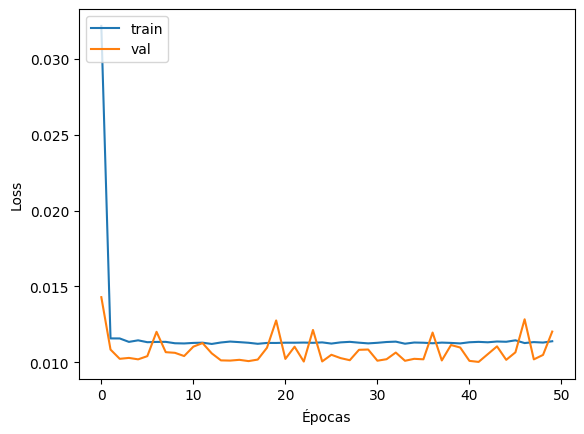

In [129]:
#scatter plot
plt.plot(my_model.history['loss'])
plt.plot(my_model.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Épocas')

Ativação logística

In [135]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [153]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




# Inicialize o MLPRegressor com ativação logística
mlp_regressor = MLPRegressor(hidden_layer_sizes=(200, 150, 10),
                             activation='logistic',  # Ativação logística (sigmoid)
                             alpha=0.01,  # Parâmetro de regularização
                             max_iter=200,  # Número máximo de iterações
                             random_state=42)

# Treine o modelo
mlp_regressor.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = mlp_regressor.predict(X_test)

# Avalie o desempenho usando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 7854.492306899456


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [145]:
X.head()

,room_type_Entire home/apt,room_type_Private room,bairro_group_Manhattan,bairro_Midtown,bairro_group_Brooklyn,bairro_group_Queens,bairro_Bushwick,bairro_Chelsea,bairro_West Village,room_type_Shared room,...,bairro_Washington Heights,bairro_Upper East Side,bairro_Harlem,bairro_Ridgewood,bairro_Flatbush,bairro_NoHo,bairro_Financial District,bairro_Crown Heights,bairro_Astoria,bairro_East Flatbush
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
